In [1]:
import utils as u 

2024-02-26 15:49:28.212278: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train, y_train, x_test, y_test = u.load_data(random_seed=2) 

[0 3 0 0 2 0 2 1 3 0 0 1 2 0 3 1 0 2 0 2 1 3 3 1 2 1 0 1 1 2 0 1 0 3 1 0 0
 2 1 2 1 3 3 3 0 2 2 0 0 2 0 2 3 1 0 1 1 1 2 2 3 3 2 1 0 0 0 2 0 1 0 3 2 1
 1 1 2 1 1 3 2 1 1 0 1 3 0 3 2 3 2 0 0 1 2 3 0 3 2 1 1 3 3 3 2 3 2 0 0 3 2
 3 0 3 3 2 2 2 2 1 3 1 3 2 0 2 1 2 3 2 1 2 3 1 2 3 2 1 2 3 2 3 2 0 1 0 0 0
 1 3 3 2 2 2 0 0 3 2 2 1 0 0 3 2 3 1 2 1 1 0 1 3 0 1 0 0 1 1 2 0 0 0 2 1 2
 0 0 3 1 1 1 1 2 1 1 2 2 2 3 2 2 2 0 0 3 1 0 3 0 1 2 3 1 3 3 2 0 2 1 0 0 3
 0 0 0 1 0 1 2 0 1 2 2 0 1 1 2 3 0 0 0 3 3 1 2 2 0 1 1 3 0 0 1 3 0 2]


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(204, 63) (204,) (52, 63) (52,)


In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(184, 63) (184,) (52, 63) (52,)


In [6]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
0.99888474
-0.31559476
2
0.94580257
-0.23086067


In [7]:
model = u.build_model()


In [8]:
history = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=15, batch_size=32)

Epoch 1/15
6/6 [==============================] - 1s 31ms/step - loss: 1.4121 - accuracy: 0.2446 - val_loss: 1.4170 - val_accuracy: 0.3000
Epoch 2/15
6/6 [==============================] - 0s 6ms/step - loss: 1.3514 - accuracy: 0.3098 - val_loss: 1.3420 - val_accuracy: 0.2000
Epoch 3/15
6/6 [==============================] - 0s 6ms/step - loss: 1.3133 - accuracy: 0.3696 - val_loss: 1.2840 - val_accuracy: 0.5500
Epoch 4/15
6/6 [==============================] - 0s 6ms/step - loss: 1.2853 - accuracy: 0.4620 - val_loss: 1.2534 - val_accuracy: 0.6000
Epoch 5/15
6/6 [==============================] - 0s 5ms/step - loss: 1.2585 - accuracy: 0.4511 - val_loss: 1.2293 - val_accuracy: 0.6000
Epoch 6/15
6/6 [==============================] - 0s 6ms/step - loss: 1.2317 - accuracy: 0.5435 - val_loss: 1.2116 - val_accuracy: 0.7000
Epoch 7/15
6/6 [==============================] - 0s 6ms/step - loss: 1.2077 - accuracy: 0.6250 - val_loss: 1.1902 - val_accuracy: 0.7000
Epoch 8/15
6/6 [=================

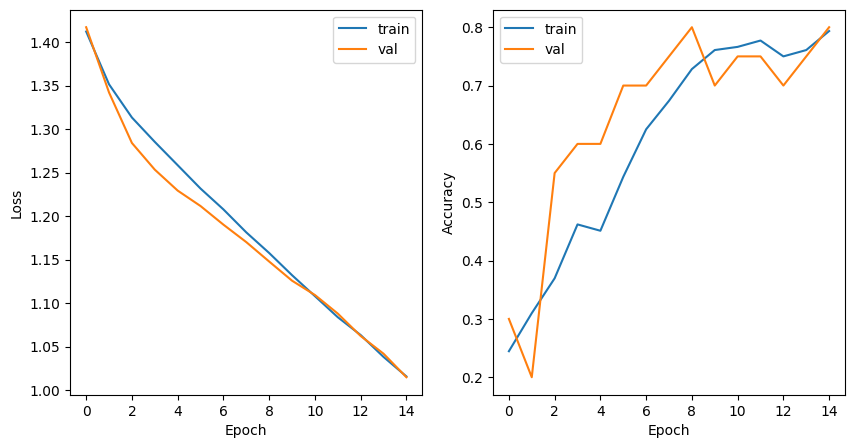

In [9]:
u.plot_loss(history)

In [14]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

2/2 [==============================] - 0s 3ms/step - loss: 0.9779 - accuracy: 0.8077
0 2 0 3 0
3.0 1.0 0.0 3.0 0.0
[0 2 0 3 0 2 2 0 1 3 3 2 0 2 1 0 0 0 0 0 0 1 0 1 2 0 1 2 2 2 1 1 0 3 0 0 0
 3 3 1 2 2 0 1 2 3 0 0 2 0 0 2]


In [11]:
model.save('./Handpose-Recognition')

INFO:tensorflow:Assets written to: ./Handpose-Recognition/assets


INFO:tensorflow:Assets written to: ./Handpose-Recognition/assets


In [12]:
# %pip install tensorflowjs

In [13]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week4-Real-Time-Posture-Recognition/Handpose-Recognition\
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week4-Real-Time-Posture-Recognition/tfjsmodel
